# Dependências

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carregando os dados

In [0]:
df = pd.read_csv('https://canvas.instructure.com/files/79840847/download?download_frd=1')
df.head()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
0,8.7,10.0,9.0,9.1,8.4,8.477647
1,7.0,7.0,7.7,7.0,6.2,6.851724
2,8.6,9.8,7.9,9.6,8.7,9.090588
3,7.8,8.3,6.8,8.2,8.0,7.283516
4,5.2,9.3,5.0,8.5,5.0,7.205747


# Sumário dos Dados

In [0]:
df.describe()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,7.200000,8.480114,7.407955,8.172727,6.323864,7.332535
std,1.228493,0.984522,1.346278,0.894007,1.293662,0.849758
min,5.000000,6.200000,5.000000,5.900000,5.000000,4.874468
25%,6.275000,7.700000,6.500000,7.500000,5.100000,6.841484
50%,7.200000,8.500000,7.750000,8.200000,5.800000,7.274746
75%,8.125000,9.300000,8.325000,8.800000,7.500000,7.883292
max,9.800000,10.000000,10.000000,10.000000,9.300000,9.090588


# Partição Treino/Teste

In [0]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)

In [0]:
df.corr()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
Cálculo1,1.000000,0.128012,0.202796,0.230664,0.235273,0.308343
LPT,0.128012,1.000000,0.285040,0.272313,0.101950,0.259328
P1,0.202796,0.285040,1.000000,0.441394,0.280180,0.491188
IC,0.230664,0.272313,0.441394,1.000000,0.212755,0.571361
Cálculo2,0.235273,0.101950,0.280180,0.212755,1.000000,0.229566
cra,0.308343,0.259328,0.491188,0.571361,0.229566,1.000000


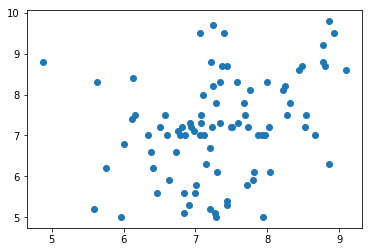

In [0]:
plt.scatter(df.cra, df['Cálculo1'])

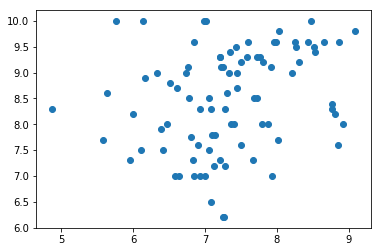

In [0]:
plt.scatter(df.cra, df['LPT'])

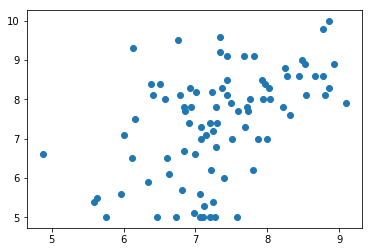

In [0]:
plt.scatter(df.cra, df['P1'])

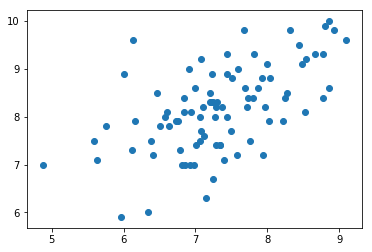

In [0]:
plt.scatter(df.cra, df['IC'])

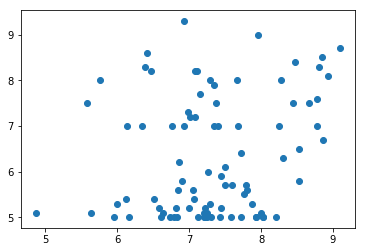

In [0]:
plt.scatter(df.cra, df['Cálculo2'])

In [0]:
import math

## Modelo com a variável melhor correlacionada

In [0]:
model = LinearRegression()
model.fit(x_train[['IC']].values, y_train)
y_test_pred = model.predict(x_test[['IC']])
y_train_pred = model.predict(x_train[['IC']])


print('TEST RMSE:', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('TRAIN RMSE:', math.sqrt(mean_squared_error(y_train, y_train_pred)))

TEST RMSE: 0.7770049873182351
TRAIN RMSE: 0.6837657392702572


## Modelo com as três variáveis melhores correlacionadas

In [0]:
model = LinearRegression()
model.fit(x_train[['IC', 'P1', 'Cálculo1']].values, y_train)
y_test_pred = model.predict(x_test[['IC', 'P1', 'Cálculo1']])
y_train_pred = model.predict(x_train[['IC', 'P1', 'Cálculo1']])


print('TEST RMSE:', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('TRAIN RMSE:', math.sqrt(mean_squared_error(y_train, y_train_pred)))

TEST RMSE: 0.8382401118590868
TRAIN RMSE: 0.6190018774663574


## Modelo com todas as variáveis

In [0]:
model = LinearRegression()
model.fit(x_train[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']].values, y_train)
y_test_pred = model.predict(x_test[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']])
y_train_pred = model.predict(x_train[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']])


print('TEST RMSE:', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('TRAIN RMSE:', math.sqrt(mean_squared_error(y_train, y_train_pred)))

TEST RMSE: 0.8697000157077178
TRAIN RMSE: 0.6136496383974169


### O melhor modelo em termos de RMSE foram: Utilizando a variável melhor correlacionada e utilizando todas as variaveis, para o conjunto de teste e de treinamento, respectivamente. Isso ocorre pois  

In [0]:
from sklearn.model_selection import KFold
import random

# Calcule a média dos erros de treino e teste para os modelos criados nos itens 3, 4 e 5 acima.

In [0]:
train_scores1 = []
test_scores1 = []
train_scores2 = []
test_scores2 = []
train_scores3 = []
test_scores3 = []

for i in range(10):
    
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=random.randint(0,100))
  model = LinearRegression()
  model.fit(x_train[['IC']].values, y_train)
  y_test_pred = model.predict(x_test[['IC']])
  y_train_pred = model.predict(x_train[['IC']])
  
  train_scores1.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  test_scores1.append(math.sqrt(mean_squared_error(y_train, y_train_pred)))
  
  model = LinearRegression()
  model.fit(x_train[['IC', 'P1', 'Cálculo1']].values, y_train)
  y_test_pred = model.predict(x_test[['IC', 'P1', 'Cálculo1']])
  y_train_pred = model.predict(x_train[['IC', 'P1', 'Cálculo1']])

  train_scores2.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  test_scores2.append(math.sqrt(mean_squared_error(y_train, y_train_pred)))
  
  model = LinearRegression()
  model.fit(x_train[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']].values, y_train)
  y_test_pred = model.predict(x_test[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']])
  y_train_pred = model.predict(x_train[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']])

  train_scores3.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  test_scores3.append(math.sqrt(mean_squared_error(y_train, y_train_pred)))



### MODELO COM APENAS A VARIÁVEL MELHOR CORRELACIONADA

<BarContainer object of 2 artists>

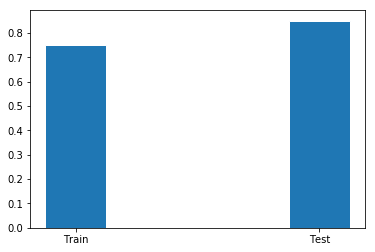

In [64]:
plt.bar(['Train', 'Test'], [sum(train_scores1)/10, sum(test_scores1)/10], width=0.25, edgecolor='white', label='var1')

### MODELO COM AS TRÊS VARIÁVEIS MELHORES CORRELACIONADAS

<BarContainer object of 2 artists>

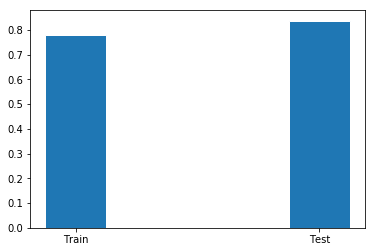

In [63]:
plt.bar(['Train', 'Test'], [sum(train_scores2)/10, sum(test_scores2)/10], width=0.25, edgecolor='white', label='var1')

### MODELO COM TODAS AS VARIÁVEIS

<BarContainer object of 2 artists>

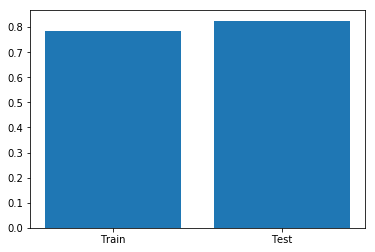

In [75]:
plt.bar(['Train', 'Test'], [sum(train_scores3)/10, sum(test_scores3)/10])

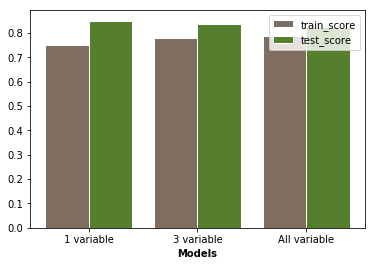

In [81]:
barWidth = 0.4
 
bars1 = [sum(train_scores1)/10, sum(train_scores2)/10, sum(train_scores3)/10]
bars2 = [sum(test_scores1)/10, sum(test_scores2)/10, sum(test_scores3)/10]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='train_score')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='test_score')
 
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['1 variable', '3 variable', 'All variable'])
 
plt.legend()
plt.show()
